In [63]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import os
import re 
import requests
import json

**Gathering Data**

In [64]:
#The WeRateDogs Twitter archive
# read csv file
twitter_archive_DF = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_DF.head()


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [65]:
#The tweet image predictions
# URL image download from udacity server and write them in image-predictions.tsv
Image_Predictions_URL ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(Image_Predictions_URL)
#create file
with open(os.path.join('image-predictions.tsv'), mode ='wb') as file:
    file.write(response.content)
# read tsv file
image_prediction_DF = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction_DF.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [66]:
# create an empty list
df_list = []
# read the tweetjson.txt file, line by line, and append the json data in each line to the lis
with open('tweetjson.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })       

# Create panda DataFrame with tweet_id, retweet_count,favorite_count
json_DF = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count','favorite_count'])

**Assessing Data**

In [67]:
json_DF.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [68]:
json_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Visual Assessment the data

In [69]:
twitter_archive_DF.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [70]:
twitter_archive_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [71]:
twitter_archive_DF.rating_numerator

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      13
20      12
21      13
22      14
23      13
24      13
25      12
26      13
27      13
28      13
29      12
        ..
2326     2
2327     7
2328     9
2329    11
2330     6
2331     8
2332    10
2333     9
2334     3
2335     1
2336    11
2337    10
2338     1
2339    11
2340     8
2341     9
2342     6
2343    10
2344     9
2345    10
2346     8
2347     9
2348    10
2349     2
2350    10
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

In [72]:
twitter_archive_DF.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [73]:
image_prediction_DF.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [74]:
json_DF.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [75]:
image_prediction_DF.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [76]:
image_prediction_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
image_prediction_DF.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [78]:
image_prediction_DF.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [79]:
twitter_archive_DF.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [80]:
sum(image_prediction_DF.jpg_url.duplicated())

66

In [81]:
sum(twitter_archive_DF.duplicated())

0

In [82]:
twitter_archive_DF.expanded_urls.isnull().sum()

59

**Quality issues**

1. Fix 59 expanded_urls missing in twitter_archive_DF.
2. Change timestamp and retweeted_status_timestamp in twitter_archive_DF from object format to datetime format.
3. Drop the duplicated 66 jpg_url in image_prediction_DF
4. Remove herf from source column to get the tweet source
5. Drop 'doggo', 'floofer', 'pupper', 'puppo' column after merging them to dog_stage.
6. Replace the result in dog_stage column to make it clear for analysis from 4 result in one column to one result
7. Replace None to nan in dog_stage to make it like normal data and remove the None for visual and analysis part.
8. Change the type of 'dog_stage' to 'category' format for analysis part
9. Rename some columns with clear names like{'name': 'dog_name','text': 'tweet_text','dog_rating': 'dog_rating_numerator','rating_denominator': 'dog_rating_denominator'}  
10. Replace doge_name that are not written correctly like 'an'and 'a'..to none
11. Determine isnull().sum of retweeted_status_id then delete retweeted_status_id to make sure that their is no repeated tweets and we get uniqe teweets
12. Drop unnecesary column that not needed in analysis.

**Tidiness issues**

1. Tidiness 1: merge  table twitter_archive_DF_clean with json_DF_clean in df datafram
2. Tidiness 2: merge all 3 tables(twitter_archive_DF_clean,json_DF_clean and image_prediction_DF_clean) in df_all datafram.
3. Tidiness 3: merge 4 columns(doggo, floofer, pupper, and puppo) in twitter_archive_DF_clean to one column name 'dog_stage'


**Cleaning:**
    
        

In [83]:
#make copy of the 3 dataset tables to start cleaning
twitter_archive_DF_clean = twitter_archive_DF.copy()
json_DF_clean = json_DF.copy()
image_prediction_DF_clean = image_prediction_DF.copy()


In [84]:
#Quality 1: twitter_archive_DF have 59 expanded_urls missing that need to be fixed
# since the format of the expanded_urls is https://twitter.com/dog_rates/status/892420643... 
#which is fixed except for the last number that represent the tweet_id , I can find the missing expanded_urls using the tweet_id
# If expanded_urls is null, add by using tweet id
def add_missing_urls(row):
    # if the Expanded_urls is missing add the formate https://twitter.com/dog_rates/status/{}
    if pd.isnull(row['expanded_urls']):
        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row
    else:
        pd.notnull(row['expanded_urls'])
        return row
# Save dataframe with missing urls
twitter_archive_DF_clean = twitter_archive_DF_clean.apply(add_missing_urls,axis=1)

In [85]:
twitter_archive_DF_clean.expanded_urls.isnull().sum()

0

In [86]:
#Tidiness 1: merge  table twitter_archive_DF_clean with json_DF_clean uisng 'tweet_id'
df= pd.merge(twitter_archive_DF_clean, json_DF_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2354 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
retweet_count                 23

In [87]:
#Tidiness 2; merge all 3 tables(twitter_archive_DF_clean,json_DF_clean and image_prediction_DF_clean)df_all = pd.merge(df, image_prediction_DF_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')
df_all = pd.merge(df, image_prediction_DF_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

In [88]:
# Quality 2:change timestamp and retweeted_status_timestamp in df_all from object format to datetime format.
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
df_all['retweeted_status_timestamp'] = pd.to_datetime(df_all['retweeted_status_timestamp'])


In [89]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count      

In [90]:
# Quality 3:drop the duplicated 66 jpg_url in image_prediction_DF
df_all = df_all.drop_duplicates(['jpg_url'])

df_all.jpg_url.duplicated().sum()


0

In [91]:
# Quality 4: remove unnecessary html tags in source column like <a href="http://twitter.com/download/iphone".. and leave only the tweet source 
href = re.compile(r'<([^>]+>|/a>)')

def no_href(source):
    return href.sub('', source)

df_all['source'] = df_all['source'].apply(no_href)

In [92]:
df_all.source.value_counts()

Twitter for iPhone    1969
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [93]:
# Tidness 3: merge 4 columns(doggo, floofer, pupper, and puppo) in twitter_archive_DF_clean to one column name 'dog_stage'
df_all['dog_stage']=df_all['doggo']+df_all['floofer']+df_all['pupper']+df_all['puppo']
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2008 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2008 non-null datetime64[ns]
source                        2008 non-null object
text                          2008 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2008 non-null object
rating_numerator              2008 non-null int64
rating_denominator            2008 non-null int64
name                          2008 non-null object
doggo                         2008 non-null object
floofer                       2008 non-null object
pupper                        2008 non-null object
puppo                         2008 non-null object
retweet_count      

In [94]:
#Quality5:drop the 'doggo', 'floofer', 'pupper', 'puppo' column since its no more needed
df_all = df_all.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_all.dog_stage.value_counts()

NoneNoneNoneNone        1699
NoneNonepupperNone       206
doggoNoneNoneNone         63
NoneNoneNonepuppo         22
doggoNonepupperNone        9
NoneflooferNoneNone        7
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [95]:
# Quality 6:replace the result in dog_stage column to make it clear for analysis from 4 result in one coloumn to one result
df_all["dog_stage"]= df_all["dog_stage"].replace('NoneNoneNoneNone','None')
df_all["dog_stage"]= df_all["dog_stage"].replace('NoneNonepupperNone', 'pupper')
df_all["dog_stage"]= df_all["dog_stage"].replace('doggoNoneNoneNone', 'doggo')
df_all["dog_stage"]= df_all["dog_stage"].replace('NoneNoneNonepuppo', 'puppo')
df_all["dog_stage"]= df_all["dog_stage"].replace('doggoNoneNonepuppo', 'doggo,puppo')
df_all["dog_stage"]= df_all["dog_stage"].replace('NoneflooferNoneNone', 'floofer')
df_all["dog_stage"]= df_all["dog_stage"].replace('doggoNonepupperNone', 'doggo,pupper')
df_all["dog_stage"]= df_all["dog_stage"].replace('doggoflooferNoneNone', 'doggo,floofer')
df_all.dog_stage.value_counts()

None             1699
pupper            206
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [96]:
# Quality 7: replace None to nan to make to make it like normal data
df_all["dog_stage"]= df_all["dog_stage"].replace({'None':np.nan})
df_all.dog_stage.value_counts()

pupper           206
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [97]:
# Quality 8:Change the type of dog_stage to 'category' format for analysis part
df_all.dog_stage = df_all.dog_stage.astype('category')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2008 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2008 non-null datetime64[ns]
source                        2008 non-null object
text                          2008 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2008 non-null object
rating_numerator              2008 non-null int64
rating_denominator            2008 non-null int64
name                          2008 non-null object
retweet_count                 2008 non-null int64
favorite_count                2008 non-null int64
jpg_url                       2008 non-null object
img_num                       2008 non-null int64
p1                    

In [98]:
# Quality 9:Rename some columns with clear names: {'name': 'dog_name','text': 'tweet_text','dog_rating': 'dog_rating_numerator','rating_denominator': 'dog_rating_denominator'}  
column_names_change = {'name': 'dog_name','text': 'tweet_text','rating_numerator': 'dog_rating_numerator','rating_denominator': 'dog_rating_denominator'}  
df_all.rename(columns=column_names_change, inplace=True)

In [99]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2008 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2008 non-null datetime64[ns]
source                        2008 non-null object
tweet_text                    2008 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2008 non-null object
dog_rating_numerator          2008 non-null int64
dog_rating_denominator        2008 non-null int64
dog_name                      2008 non-null object
retweet_count                 2008 non-null int64
favorite_count                2008 non-null int64
jpg_url                       2008 non-null object
img_num                       2008 non-null int64
p1                    

In [100]:
# Quality 10:Replace doge_name that are not written correctly like 'an'and 'a'..to none
unclear_dogs_name = ['a','None','an' ,'the','Link','just','this','by','such','very','one','quite','not','my']
for name in unclear_dogs_name:
    df_all.loc[df_all.dog_name == name, 'dog_name'] = None

In [101]:
df_all.dog_name.value_counts()


Charlie       11
Cooper        10
Oliver        10
Lucy          10
Tucker         9
Penny          9
Winston        8
Sadie          8
Toby           7
Daisy          7
Lola           7
Koda           6
Bo             6
Bella          6
Jax            6
Stanley        6
Scout          5
Buddy          5
Rusty          5
Bailey         5
Milo           5
Chester        5
Leo            5
Louis          5
Dave           5
Oscar          5
Finn           4
Oakley         4
Chip           4
Larry          4
              ..
Moreton        1
Ben            1
Horace         1
Maxwell        1
Ralph          1
Hermione       1
Pavlov         1
Brandonald     1
Roscoe         1
Banditt        1
Buddah         1
Wishes         1
Spencer        1
Augie          1
Angel          1
Tater          1
Willem         1
Jonah          1
Maks           1
Rambo          1
Charl          1
Taz            1
Sunshine       1
Klein          1
Tonks          1
Traviss        1
Sully          1
Pipsy         

In [102]:
# Quality 11:Determine the sum of retweeted_status_id then delete retweeted_status_id to make sure that their is no repeated tweets and we get uniqe teweets
df_all.retweeted_status_id.isnull().sum()

1929

In [103]:
# Delete retweeted_status_id to make sure that their is no repeated tweets and we get uniqe teweets df_all.drop(['retweeted_status_id'], axis=1, inplace=True)
df_all.drop(['retweeted_status_id'], axis=1, inplace=True)


In [104]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id                      2008 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2008 non-null datetime64[ns]
source                        2008 non-null object
tweet_text                    2008 non-null object
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2008 non-null object
dog_rating_numerator          2008 non-null int64
dog_rating_denominator        2008 non-null int64
dog_name                      1360 non-null object
retweet_count                 2008 non-null int64
favorite_count                2008 non-null int64
jpg_url                       2008 non-null object
img_num                       2008 non-null int64
p1                            2008 non-null object
p1_conf              

In [105]:
# Quality 12: Drop unnecessary column that i will not use in analysis part
df_all.drop(['in_reply_to_status_id','in_reply_to_user_id','img_num','retweeted_status_user_id','retweeted_status_timestamp','p1','p1_conf','p1_dog','p2', 'p2_conf','p2_dog', 'p3','p3_conf','p3_dog'],axis=1, inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 12 columns):
tweet_id                  2008 non-null int64
timestamp                 2008 non-null datetime64[ns]
source                    2008 non-null object
tweet_text                2008 non-null object
expanded_urls             2008 non-null object
dog_rating_numerator      2008 non-null int64
dog_rating_denominator    2008 non-null int64
dog_name                  1360 non-null object
retweet_count             2008 non-null int64
favorite_count            2008 non-null int64
jpg_url                   2008 non-null object
dog_stage                 309 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 190.6+ KB


**Analyze and Visualize results**

In [106]:
df_all.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                          tweet_text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  dog_rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                    13   
1  https://twitter.com/dog_rates/status/892177421...                    13   
2  https://twitter.com/dog_rates/status/891815181...                    12   
3  https://twitter.com/dog_rates/status/891689557...                    13   
4  https://twitter.com/dog_rates/status/891327558...                    12   

   dog_rating_denominator  dog_name  retweet_count  favorite_count  \
0                      10   Phineas           8853           39467   
1                      10     Tilly           6514           33819   
2                      10    Archie           4328           25461   
3                      10     Darla           8964           42908   
4                      10  Franklin           9774           41048   

                                           jpg_url dog_stage  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg       NaN  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg       NaN  
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg       NaN  
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg       NaN  
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg       NaN

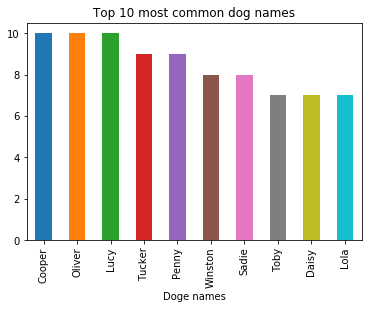

In [107]:
# Visualize 1: visualize the 10 top popular dog names are(lucy-cooper and oliver) are the top name used
df_all.dog_name.value_counts()[1:11].plot('bar',title="Top 10 most common dog names").set_xlabel("Doge names");


**Visualize 1:** From the bar chart we can see that most popular names are ('lucy,cooper,oliver')

In [108]:
# Insight 1: pupper is the most repeated dog_stage
dog_stage_count = df_all['dog_stage'].value_counts()
dog_stage_count

pupper           206
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

**Insight 1** pupper is the most repeated dog_stage

In [109]:
#Insight 2:Check the most popular tweet source
df_all['source'].value_counts()

Twitter for iPhone    1969
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

**Insight 2** Twitter for iphone is most popular usage

In [110]:
#Insight 3 :find dog_stage retweet more in avreage
df_all.groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo             7125.698413
doggo,floofer     3433.000000
doggo,pupper      4083.444444
doggo,puppo      19196.000000
floofer           4968.714286
pupper            2331.961165
puppo             6473.954545
Name: retweet_count, dtype: float64

**Insight 3** (doggo,puppo) and (puppo) got more retweeted on avreage

In [111]:
#insight 4 : find dog_stage that moe favorit_count
df_all.groupby('dog_stage')['favorite_count'].mean()


dog_stage
doggo            16066.682540
doggo,floofer    17169.000000
doggo,pupper      6426.333333
doggo,puppo      47844.000000
floofer          13206.000000
pupper            6595.645631
puppo            20736.590909
Name: favorite_count, dtype: float64

**Insight 4** (doggo,puppo) and (puppo) got more likes on avreage

sources:
1. https://classroom.udacity.com/
2. https://stackoverflow.com/questions/25747985/python-reading-in-multi-column-tsv-file-with-row-numbers/52398675
3. https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
4. https://stackoverflow.com/
5. https://slack.com/intl/en-sa/
6. https://www.geeksforgeeks.org/python-pandas-series-str-replace-to-replace-text-in-a-series/
7. https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
8. https://thispointer.com/
9. https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
10. https://www.kaggle.com/
11. https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
12. https://plot.ly/python/
13. http://www.tweepy.org/
14. https://developer.twitter.com/en/docs/basics/rate-limiting
15. https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
16. https://twitter.com/dog_rates/status/889531135344209921
17. https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv